# Bidirectional RNN

A Bidirectional Recurrent Neural Network (BRNN) is an extension of the traditional RNN that processes sequential data in both forward and backward directions. This allows the network to utilize both past and future context when making predictions providing a more comprehensive understanding of the sequence.

Like a traditional RNN, a BRNN moves forward through the sequence, updating the hidden state based on the current input and the prior hidden state at each time step. The key difference is that a BRNN also has a backward hidden layer which processes the sequence in reverse, updating the hidden state based on the current input and the hidden state of the next time step.

Compared to unidirectional RNNs BRNNs improve accuracy by considering both the past and future context. This is because the two hidden layers i.e forward and backward complement each other and predictions are made using the combined outputs of both layers.

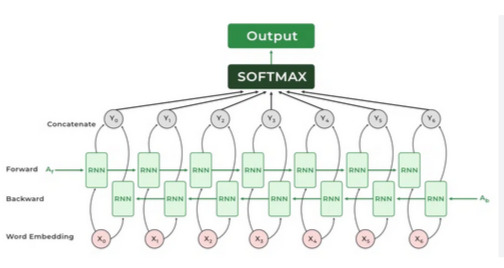

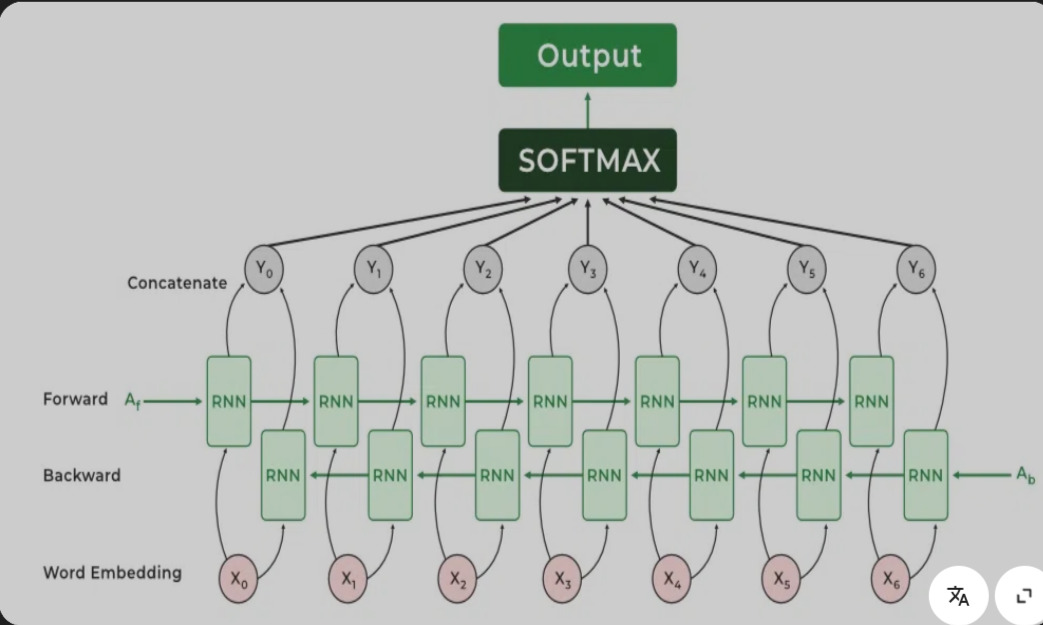

# Figuring How Bidirectional RNN works in Pytorch

In [1]:
import numpy as np
import torch, torch.nn as nn #This module(torch.nn) is a crucial part of PyTorch for building neural networks
from torch.autograd import Variable #in PyTorch refers to importing the Variable class, which was a 
                                    #fundamental component of PyTorch's automatic differentiation (autograd) 
                                    # system in older versions.

# Initialize Input Sequence Randomly

requires_grad attribute, which, when set to True, indicated that gradients should be computed for that specific variable during backpropagation. 

When requires_grad = False is set for the parameters of a specific layer or part of a neural network, those parameters will not be updated during the optimization step (e.g., during backpropagation with an optimizer like SGD or Adam). This effectively "freezes" those layers, preventing their weights and biases from changing during training. 
This is commonly used in:-

   1) Transfer Learning: When using a pre-trained model, you might freeze the early layers (feature extractors) and only train the later, task-specific layers.
    
   2) Fine-tuning: Selectively training only certain parts of a model while keeping others fixed.
   
   3) Generative Adversarial Networks (GANs): Freezing one component (e.g., discriminator) while training the other (e.g., generator) and vice-versa.

In [2]:
# this creates a 3D tensor with shape (5, 1, 1) filled in-place with random numbers 
#from the standard normal (mean 0, std 1)
random_input = Variable(torch.FloatTensor(5, 1, 1).normal_(), requires_grad=False)
random_input[:, 0, 0]

tensor([1.3344, 0.2720, 0.7553, 0.4082, 2.7579])

# Gated Recurrent Unit(GRU) Networks

LSTMs are very complex structure with higher computational cost. To overcome this Gated Recurrent Unit (GRU) where introduced which uses LSTM architecture by merging its gating mechanisms offering a more efficient solution for many sequential tasks without sacrificing performance. The core idea behind GRUs is to use gating mechanisms to selectively update the hidden state at each time step allowing them to remember important information while discarding irrelevant details. 

# Initialize a Bidirectional GRU Layer

In [3]:
bi_grus = torch.nn.GRU(input_size=1, hidden_size=1, num_layers=1, batch_first=False, bidirectional=True)

# Initialize a GRU Layer ( for Feeding the Sequence Reversely)

In [4]:
reverse_gru = torch.nn.GRU(input_size=1, hidden_size=1, num_layers=1, batch_first=False, bidirectional=False)

In [5]:
reverse_gru.weight_ih_l0 = bi_grus.weight_ih_l0_reverse
reverse_gru.weight_hh_l0 = bi_grus.weight_hh_l0_reverse
reverse_gru.bias_ih_l0 = bi_grus.bias_ih_l0_reverse
reverse_gru.bias_hh_l0 = bi_grus.bias_hh_l0_reverse

# Feed Input Sequence into Both Networks

In [6]:
bi_output, bi_hidden = bi_grus(random_input)

In [7]:
reverse_output, reverse_hidden = reverse_gru(random_input[np.arange(4, -1, -1), :, :])

# Check Outputs

In [8]:
reverse_output[:, 0, 0]

tensor([0.4030, 0.2405, 0.2002, 0.0832, 0.2412], grad_fn=<SelectBackward0>)

In [9]:
bi_output[:, 0, 1]

tensor([0.2412, 0.0832, 0.2002, 0.2405, 0.4030], grad_fn=<SelectBackward0>)

# Check Hidden States

In [10]:
reverse_hidden

tensor([[[0.2412]]], grad_fn=<StackBackward0>)

In [11]:
bi_hidden[1]

tensor([[0.2412]], grad_fn=<SelectBackward0>)